# 🚘 💵 HW4 Lab: Used cars and linear regression

<img src="https://github.com/joshuagrossman/mse125-labs-public/blob/main/hw4/img/cars.jpeg?raw=1" alt= “cars” width="500" />

## ✅ Setup and data import
In this lab, we'll explore correlation, simple regression, multiple regression, and confidence intervals with used car data from [Edmunds.com](https://edmunds.com). Our goal will be to predict the price of used cars using the features of each car.

In [3]:
# Load in additional functions
library(tidyverse)
library(lubridate)

# Use three digits past the decimal point
# Don't use scientific notation
options(digits = 3, scipen=999)

# Format plots with a white background and dark features.
theme_set(theme_bw())

# Increase the default text size of plots.
# If you are *not* working in Google Colab, we recommend commenting
# out this line of code.
theme_update(text = element_text(size = 20))

# Increase the default plot width and height.
# If you are *not* working in Google Colab, we recommend commenting
# out this line of code.
options(repr.plot.width=12, repr.plot.height=8)

cars = read_tsv("https://jdgrossman.com/assets/used-cars.tsv")

# peek at 10 random rows
sample_n(cars, 10)

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (ipython-input-1056257054.py, line 20)

## 🚀 Exercise 1

Create a new dataset called `accords`. The dataset should only include rows corresponding to used Honda Accords.

Using the `accords` data and the `lm` function, fit the following linear regression model:

$$ y_{\text{price,}i} = \beta_0 + \beta_1 x_{\text{mileage},i} + \epsilon_i, $$

where $\epsilon_i \sim N(0, \sigma^2)$.

Print your regression output with the `summary` function. Using your output, identify and interpret the following quantities in no more than one sentence each:

- $\hat{\beta}_0$
- $\hat{\beta}_1$
- $\text{se}({\hat{\beta}_0})$,
- $\text{se}({\hat{\beta}_1})$,
- $\hat{\sigma}$
- $\text{R}^2$

Note: You should not report more precision than is necessary. For example, if your model returns a coefficient of 1.123456, it's sufficient (and desirable) to report 1.1 or 1.12 as the coefficient.

In [4]:
import pandas as pd
import statsmodels.api as sm

dataset = "https://jdgrossman.com/assets/used-cars.tsv"
cars = pd.read_csv(dataset, sep="\t")

# Filter  Honda Accords
accords = cars[(cars['make'] == 'Honda') & (cars['model'] == 'Accord')]

y = accords['price']
X = accords['mileage']

# Add constant term for intercept β0
X = sm.add_constant(X)

# Fit linear regression model
model = sm.OLS(y, X).fit()

print(model.summary())
sigma_hat = (model.mse_resid) ** 0.5
print("Sigma Hat (σ̂):", sigma_hat)



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     348.9
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           2.58e-37
Time:                        06:10:30   Log-Likelihood:                -1122.7
No. Observations:                 122   AIC:                             2249.
Df Residuals:                     120   BIC:                             2255.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.068e+04    399.474     51.757      0.0


---

The value of $\hat{\beta}_0$ with units: 20680 dollars

Interpretation:When mileage = 0, the expected price of a used Honda Accord is about 20,680 dollars

---

The value of $\hat{\beta}_1$ with units:–0.0878 dollars per mile

Interpretation:For each additional mile driven, the expected price of a Honda Accord decreases by about 0.088 dollars.

---

The value of $\text{se}({\hat{\beta}_0})$ with units:399 dollars

Interpretation: The intercept (price at 0 miles) has an uncertainty of about 399 dollars

---

The value of $\text{se}({\hat{\beta}_1})$ with units:0.005 dollars per mile

Interpretation:The slope estimate (price drop per mile) has an uncertainty of about 0.005 dollars per mile

---

The value of $\hat{\sigma}$ with units: 2420 dollars

Interpretation: Average prediction error is about 2420 dollars means the model’s predicted price is about 2420 dollars different from the actual price

---

The value of $\text{R}^2$ with units:0.744

Interpretation:Mileage explains 74.4% of the variation in the prices of used Honda Accords

---


## 🚀 Exercise 2

Using the `predict` function and the model from the previous exercise, predict the average price of a used Honda Accord with an odometer reading of 50,000 miles. Provide a normally-approximated confidence interval for this mean.

In [5]:
new_data = pd.DataFrame({'const': [1], 'mileage': [50000]})

prediction = model.get_prediction(new_data)
prediction_summary = prediction.summary_frame(alpha=0.05)  # let 95% Confidence interval

print(prediction_summary[['mean', 'mean_ci_lower', 'mean_ci_upper']])

           mean  mean_ci_lower  mean_ci_upper
0  16285.195458   15809.146776   16761.244141


## 🚀 Exercise 3

Repeat Exercise 2 for a used Honda Accord with an odometer reading of 300,000 miles.

Using this result, can you identify a critical issue with your regression model? Answer in one or two sentences.

In [6]:
new_data_300k = pd.DataFrame({'const': [1], 'mileage': [300000]})

prediction_300k = model.get_prediction(new_data_300k)
prediction_summary_300k = prediction_300k.summary_frame(alpha=0.05)

print(prediction_summary_300k[['mean', 'mean_ci_lower', 'mean_ci_upper']])


          mean  mean_ci_lower  mean_ci_upper
0 -5667.200184   -7842.016905   -3492.383462


---


The linear regression model assumes a straight-line relationship between mileage and price. Predicting for 300,000 miles (far beyond the data range) may give an unrealistic or negative price, showing that the model fails for extreme extrapolation.



---

## 🚀 Exercise 4

Graphically present your regression model from Exercise 1. Specifically, plot the data with
a scatter plot, and include a regression line with the corresponding confidence bands.

- Note that this can be achieved in R using
`geom_smooth` function from `ggplot2`.

- Make sure to adjust the limits of your plot so you can see the issue you identified in the previous problem.

- Format your plot nicely!

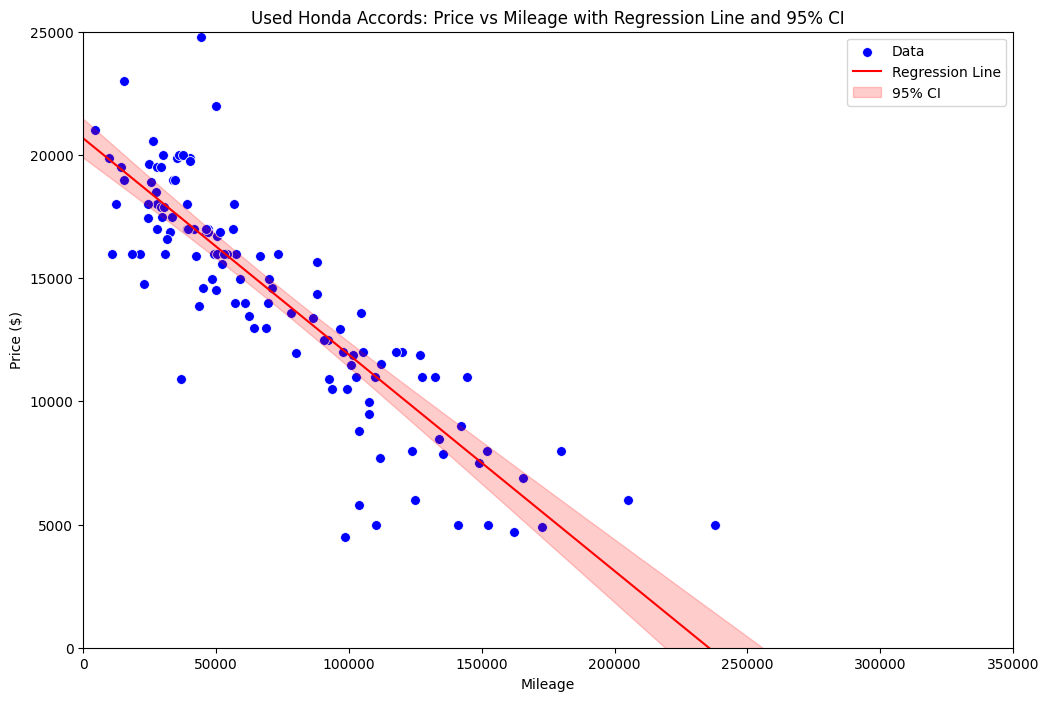

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

mileage_range = np.linspace(0, 350000, 500)
X_plot = sm.add_constant(pd.DataFrame({'mileage': mileage_range}))

pred = model.get_prediction(X_plot).summary_frame(alpha=0.05)
mean_pred = pred['mean']
ci_lower = pred['mean_ci_lower']
ci_upper = pred['mean_ci_upper']

plt.figure(figsize=(12, 8))
sns.scatterplot(x='mileage', y='price', data=accords, color='blue', s=50, label='Data')

plt.plot(mileage_range, mean_pred, color='red', label='Regression Line')

plt.fill_between(mileage_range, ci_lower, ci_upper, color='red', alpha=0.2, label='95% CI') # Plot confidence bands

plt.xlabel('Mileage')
plt.ylabel('Price ($)')
plt.title('Used Honda Accords: Price vs Mileage with Regression Line and 95% CI')
plt.xlim(0, 350000)
plt.ylim(0, 25000)
plt.legend()
plt.show()

## 🚀 Exercise 5

Address the issue illustrated in Exercises 3 and 4 by refitting your model with a log-transformed outcome.

Use your new model to predict the price (in dollars) of a Honda Accord with a mileage of 50,000 and a mileage of 300,000. **Print the new predicted prices.**

In [8]:
y_log = np.log(accords['price'])
X = sm.add_constant(accords['mileage'])

log_model = sm.OLS(y_log, X).fit()

new_mileage = pd.DataFrame({'mileage': [50000, 300000]})
new_mileage = sm.add_constant(new_mileage)

# Predict log(price)
log_pred = log_model.get_prediction(new_mileage).summary_frame(alpha=0.05)

# Convert  to original scale (dollars)
pred_prices = np.exp(log_pred['mean'])

print("Predicted price for 50,000 miles: ${:,.2f}".format(pred_prices[0]))
print("Predicted price for 300,000 miles: ${:,.2f}".format(pred_prices[1]))


Predicted price for 50,000 miles: $15,745.93
Predicted price for 300,000 miles: $2,498.62


## 🚀 Exercise 6

Graphically present your regression model from Exercise 5. Specifically, plot the data with
a scatter plot, and include a regression line with the corresponding confidence bands.

- Make sure to adjust the limits of your plot so you can see that the issue you identified earlier is now fixed.

- Format your plot nicely!

- Note that the new model can be plotted in R using the `geom_smooth` function with the following arguments:

`geom_smooth(method = "glm", formula = y~x, method.args = list(family = gaussian(link = 'log')))`

> Note: `geom_smooth(method='lm', formula=log(y)~x)` will also plot the correct model (with much prettier and clearer syntax!). However, it puts the model on a logarithmic y-scale instead of a standard numeric scale.
>
> Alternatively, you could use `geom_line()` with a dataset consisting of many possible mileage values (e.g., 0 through 350,000) along with the corresponding predictions  from your new model.

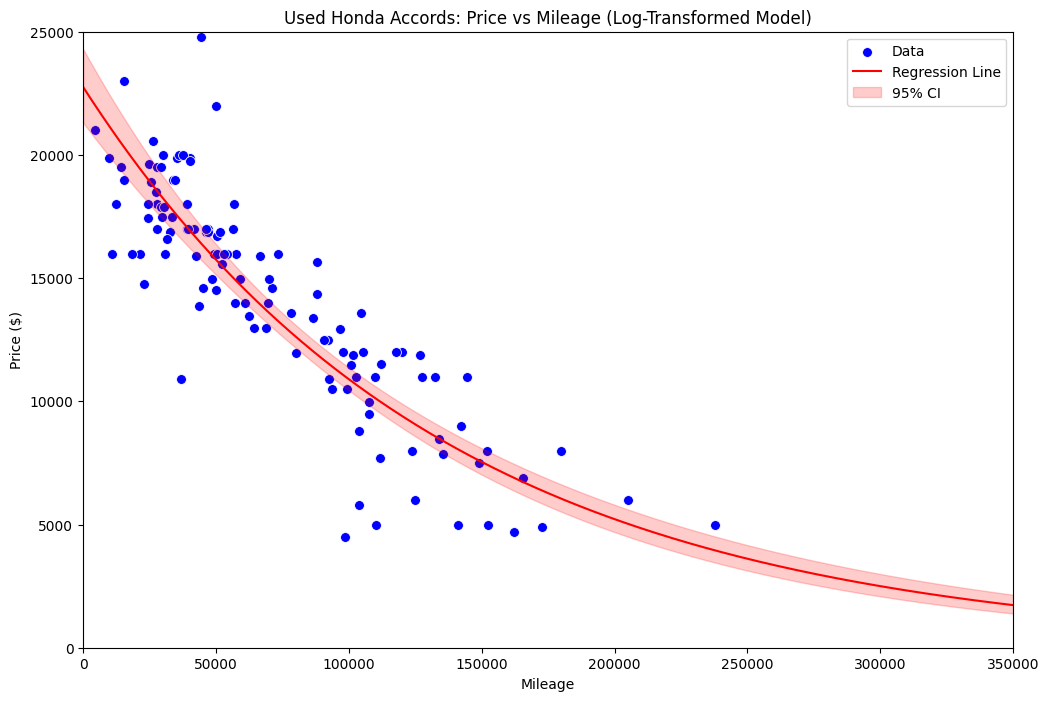

In [9]:
mileage_range = np.linspace(0, 350000, 500)
X_plot = sm.add_constant(pd.DataFrame({'mileage': mileage_range}))

# Predict log(price) and get confidence interval
pred = log_model.get_prediction(X_plot).summary_frame(alpha=0.05)

# Convert log predictions back to original price scale
mean_pred = np.exp(pred['mean'])
ci_lower = np.exp(pred['mean_ci_lower'])
ci_upper = np.exp(pred['mean_ci_upper'])

plt.figure(figsize=(12, 8))

sns.scatterplot(x='mileage', y='price', data=accords, color='blue', s=50, label='Data')

plt.plot(mileage_range, mean_pred, color='red', label='Regression Line')

# Confidence band
plt.fill_between(mileage_range, ci_lower, ci_upper, color='red', alpha=0.2, label='95% CI')

plt.xlabel('Mileage')
plt.ylabel('Price ($)')
plt.title('Used Honda Accords: Price vs Mileage (Log-Transformed Model)')
plt.xlim(0, 350000)
plt.ylim(0, 25000)
plt.legend()
plt.show()


## 🚀 Exercise 7

Identify and interpret the following components of your log-transformed model:

- $\exp(\hat{\beta}_0)$
- $\exp(\hat{\beta}_1)$
- $\text{R}^2$

Interpret $\exp(\hat{\beta}_1)$ in terms of **an increase in 10,000 miles**, not an increase of 1 mile.

Tip: Use the `coef` function to extract the model coefficients from your model object.

In [10]:
beta0 = log_model.params['const']
beta1 = log_model.params['mileage']

# Exponential of coefficients
exp_beta0 = np.exp(beta0)
exp_beta1 = np.exp(beta1)

print("exp(β0) =", round(exp_beta0, 2))
print("exp(β1) =", round(exp_beta1, 5))

r2 = log_model.rsquared
print("R^2 =", round(r2, 3))

mile_increase = 10000
effect_10k = np.exp(beta1 * mile_increase)
print(f"Effect of 10,000 mile increase: multiply price by {effect_10k:.3f}")

exp(β0) = 22754.22
exp(β1) = 0.99999
R^2 = 0.748
Effect of 10,000 mile increase: multiply price by 0.929



---

The value of $\exp(\hat{\beta}_0)$ with units: 22754.22 dollars

Interpretation: This is the estimated baseline price of a Honda Accord when the mileage is 0 miles.

---

The value of $\exp(\hat{\beta}_1)$ with units: 0.99999 per mile

Interpretation: For each additional mile, the price decreases by a factor of 0.99999

---

The value of $\text{R}^2$ with units:0.748

Interpretation: About 74.8% of the variation in log(price) is explained by mileage.

---

## 🚀 Exercise 8

Refine your regression model from Exercise 5 to include the model year as an additional predictor. You should still use just the Honda Accord data.

In one sentence, compare the $R^2$ of the revised regression model to your model from Exercise 5.

In [11]:
y_log = np.log(accords['price'])

# Include mileage and year as predictors
X = accords[['mileage', 'year']]
X = sm.add_constant(X)

log_model_year = sm.OLS(y_log, X).fit()

print(log_model_year.summary())

# Compare R^2
r2_old = log_model.rsquared
r2_new = log_model_year.rsquared
print(f"R^2 of original model (mileage only): {r2_old:.3f}")
print(f"R^2 of revised model (mileage + year): {r2_new:.3f}")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     373.8
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           4.93e-52
Time:                        06:10:56   Log-Likelihood:                 60.761
No. Observations:                 122   AIC:                            -115.5
Df Residuals:                     119   BIC:                            -107.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -122.9795     13.342     -9.217      0.0

---

Here, R^2 of original model (mileage only): 0.748,
R^2 of revised model (mileage + year): 0.863
That means the revised model explains more of the variation in price than the mileage-only model.
---

## 🚀 Exercise 9

Fit the model from Exercise 8
**the entire dataset**, not just the Honda Accords.
You'll notice that the new $R^2$ is lower than the $R^2$ from the model from Exercise 8.
In one sentence, what is the likely reason for this difference?

In [12]:

url = "https://jdgrossman.com/assets/used-cars.tsv"
cars = pd.read_csv(url, sep="\t")

y_log_all = np.log(cars['price'])

# Include mileage and year as predictors
X_all = cars[['mileage', 'year']]
X_all = sm.add_constant(X_all)

# Fit the model on the full dataset
log_model_all = sm.OLS(y_log_all, X_all).fit()

print(log_model_all.summary())

# Compare R^2
r2_honda = log_model_year.rsquared
r2_all = log_model_all.rsquared
print(f"R^2 for Honda Accord only: {r2_honda:.3f}")
print(f"R^2 for full dataset: {r2_all:.3f}")


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     1208.
Date:                Tue, 18 Nov 2025   Prob (F-statistic):          1.13e-295
Time:                        06:11:01   Log-Likelihood:                -208.30
No. Observations:                1286   AIC:                             422.6
Df Residuals:                    1283   BIC:                             438.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -147.3908      9.008    -16.363      0.0

---

The R² is lower for the full dataset (0.653) than for Honda Accords only (0.863) because the full dataset includes many different makes and models, introducing more variability in price that mileage and year alone cannot fully explain.


---

## 🚀 Exercise 10

Update the model from Exercise 9 to address the likely reason for the much smaller $R^2$.

- In this new model, what's the interpretation of the exponentiated intercept term?

- What is one change you could make to your model to make the intercept term more interpretable?

Answer in no more than three sentences.

In [16]:
y_log_all = np.log(cars['price'])

# Include mileage, year, and make as categorical variable
X_all = pd.get_dummies(cars[['mileage', 'year', 'make']], drop_first=True).astype(int)
X_all = sm.add_constant(X_all)

log_model_all_make = sm.OLS(y_log_all, X_all).fit()
print(log_model_all_make.summary())

# Exponentiated intercept
exp_intercept = np.exp(log_model_all_make.params['const'])
print("Exponentiated intercept:", round(exp_intercept, 2))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     1244.
Date:                Tue, 18 Nov 2025   Prob (F-statistic):               0.00
Time:                        06:14:52   Log-Likelihood:                 576.90
No. Observations:                1286   AIC:                            -1134.
Df Residuals:                    1276   BIC:                            -1082.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -162.2522      5.007    -

---

> Add blockquote



The exponentiated intercept represents the predicted price of a car with 0 mileage, year 0, and the baseline make. This value is not realistic because such a car does not exist. To make the intercept more interpretable,shoud  choose a meaningful reference year and mileage.

---

# 🚀 Exercise 11

Implement your suggested change from Exercise 10, and print the resulting model output.

What's the interpretation of the exponentiated intercept term? Answer in one sentence.

What's the interpretation of the term for the model year? Answer in one sentence.

In [21]:
url = "https://jdgrossman.com/assets/used-cars.tsv"
cars = pd.read_csv(url, sep="\t")

cars_clean = cars.dropna(subset=['mileage', 'year', 'price'])

cars_clean['mileage_c'] = cars_clean['mileage'] - cars_clean['mileage'].mean()
cars_clean['year_c'] = cars_clean['year'] - cars_clean['year'].mean()

y_log_all = np.log(cars_clean['price'])

X_all_numeric = cars_clean[['mileage_c', 'year_c']]

X_all_dummies = pd.get_dummies(cars_clean['make'], prefix='make', drop_first=True)

X_all = pd.concat([X_all_numeric, X_all_dummies], axis=1).astype(float)

X_all = sm.add_constant(X_all)

log_model_centered = sm.OLS(y_log_all, X_all).fit()

print(log_model_centered.summary())

# Exponentiated intercept
exp_intercept = np.exp(log_model_centered.params['const'])
print("Exponentiated intercept:", round(exp_intercept, 2))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     1244.
Date:                Tue, 18 Nov 2025   Prob (F-statistic):               0.00
Time:                        06:37:03   Log-Likelihood:                 576.90
No. Observations:                1286   AIC:                            -1134.
Df Residuals:                    1276   BIC:                            -1082.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              10.0178      0.011    9

Interpretations

Exponentiated intercept: The predicted price (in dollars) for a car with average mileage, average year, and the baseline make.

Coefficient for model year: For each additional year above the average year, the expected price multiplies by
exp
(
𝛽
year)
exp(β
year), holding mileage and make constant.